# K740: Business Applications of Data Analytics and Artificial Intelligence<br>Python for Machine Learning
## Assignment ONE: Clustering 
**Released: Monday, January 23, 2023**<br>
**Due on: Monday, February 06, 2023 Before noon.**

#### **Please enter your name and student number here:**
<div class="alert alert-block alert-info"> 
    <b>Student Info:</b><BR>
    <ul>
        <li>Student Name: Yidi Geng</li>
        <li>Student Number: 400423487</li>
        <li>MAC ID: gengy13</li>
    </ul>
</div>

**Please follow the following instructions for completing the assignment:**<br>
- **Questions will appear in red alert blocks.**
<div class="alert alert-block alert-danger"> <b>Question number:</b> The body of the question.</div>

    - **For some questions, you only need to modify and run the code.** 
    - **For other questions, you will need to write short report inside green alert blocks.**
<div class="alert alert-block alert-success"> <b>A title: (Optional)</b> Your answer. You can make part of your answer <b>bold</b>, <i>italic</i>, or <u>underlined</u> </div>

- **I will use yellow alert blocks to add helpful comments**
<div class="alert alert-block alert-warning"> <b>Comment title: </b>Comment itself
</div>

- **You will use the following packages for this assignment:**
    - *`numpy`* for mathematical calculations, 
    - *`pandas`* for data handling, 
    - *`scikit-learn`* and *`scipy`* for cluster analysis
       - *`scipy`* to demonstrate hierarchical clustering 
       - *`scikit-learn`* for non-hierarchical clustering
       <br>Both packages provide methods for both types of clustering
    - *`matplotlib`* for visualization.<br>
- **Alongside this notebook you will receive a dataset labeled *`countryriskdata.csv`*. Please:**
    - Save the dataset and notebook in your *`Working Directory`*
    - Complete the following codes, run them, and use the outcomes to answer questions.
        - Replace ------- with required codes (find them from the notebooks we used in the class and posted on the avenue)


### Dataset Description:

<div class="alert alert-block alert-warning"> <b>The dataset contains data for GDP growth, corruption index, peace index, and legal risk index from a set of countries:</b>
    <ol>
        <li>The real GDP growth rate from International Monetary Fund (IMF)</li>
        <li>The corruption index by Transparency International: <br> 
            <i>- On a scale from 0 (highly corrupt) to 100 (no corruption)</i></li>
        <li>The peace index by institute for Economics and Peace: <br> 
            <i>- On a scale from 1 (very peaceful) to 5 (not at all peaceful)</i></li>
        <li>The legal risk index by Property Rights Association: <br> 
            <i>- On a scale from 0 to 10 (with high values being favorable</i></li>
    </ol>
</div>

In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

%matplotlib inline

-----
-----
### Question 01: Exploring the data and feature scaling (15%)

-----
<div class="alert alert-block alert-danger"> <b>01-01) Please Read data from CSVfile and answer/ the following questions (2%):</b> 
    <ul>
        <li>How many countries does the dataset have?</li>
        <li>How many features are describing each country?</li>
        <li>Legal: 5.905 </li>
        <li>Show <b>the exact</b> first THREE and last THREE observations: </li>
    </ul>
</div>


In [157]:
countriesDF = pd.read_csv('countryriskdata.csv')
print("Size of the dataset (row, col): ", countriesDF.shape)
print("\nFirst few obserations\n", countriesDF.head())
print("\nLast few obserations\n", countriesDF.tail())


Size of the dataset (row, col):  (122, 6)

First few obserations
      Country Abbrev  Corruption  Peace  Legal  GDP Growth
0    Albania     AL          39  1.867  3.822       3.403
1    Algeria     DZ          34  2.213  4.160       4.202
2  Argentina     AR          36  1.957  4.568      -2.298
3    Armenia     AM          33  2.218  4.126       0.208
4  Australia     AU          79  1.465  8.244       2.471

Last few obserations
        Country Abbrev  Corruption  Peace  Legal  GDP Growth
117  Venezuela     VE          17  2.651  3.000     -18.000
118    Vietnam     VI          33  1.906  4.930       6.211
119      Yemen     YE          14  3.399  2.728      -9.779
120     Zambia     ZM          38  1.783  4.917       2.967
121   Zimbabwe     ZW          22  2.322  3.760       0.522


<div class="alert alert-block alert-success"> <b>Data set size</b> There are 122 Countries, with 4 features describing each one.</div>


----
<div class="alert alert-block alert-danger"> <b>01-02) Run summary statistics and answer the following questions (2%):</b> 
    <ul>
        <li>What is the range of each four numerical variables?</li>
        <li>Which two variables have the highest correlation?</li>
    </ul>
</div>


In [158]:
print("\nSummary statistics:\n", countriesDF.describe())
print("\nCorrelation matrix\n", countriesDF.corr())


Summary statistics:
        Corruption       Peace       Legal  GDP Growth
count  122.000000  122.000000  122.000000  122.000000
mean    46.237705    2.003730    5.598861    2.372566
std     19.126397    0.447826    1.487328    3.241424
min     14.000000    1.192000    2.728000  -18.000000
25%     31.250000    1.684750    4.571750    1.432250
50%     40.000000    1.969000    5.274000    2.496000
75%     58.750000    2.280500    6.476750    4.080000
max     90.000000    3.399000    8.633000    7.958000

Correlation matrix
             Corruption     Peace     Legal  GDP Growth
Corruption    1.000000 -0.700477  0.923589    0.102513
Peace        -0.700477  1.000000 -0.651961   -0.199855
Legal         0.923589 -0.651961  1.000000    0.123440
GDP Growth    0.102513 -0.199855  0.123440    1.000000


<div class="alert alert-block alert-success"> 
    <b>Range</b> <br>
    <ul>
        <li>Corruption: 14 to 90 </li>
        <li>Peace: 1.192 to 3.399 </li>
        <li>Legal: 2.728 to 8.633 </li>
        <li>GDP Growth: -18 to 7.958 </li>
    </ul>
     <br>
    <b>Correlation:</b> The highest correlation is 0.923589, observed between legal and corruption.
</div>

----
<div class="alert alert-block alert-danger"> <b>01-03) Create box plots for all numerical variables (3%): </b><i>(you need to complete and run the first two lines for all variables)</i> 
    <ul>
        <li>Are there any outliers in your dataframe? Which feature(s)</li>
    </ul>
</div>


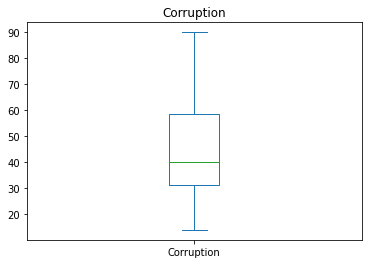

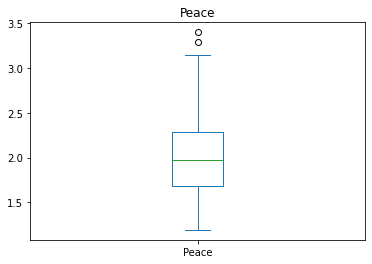

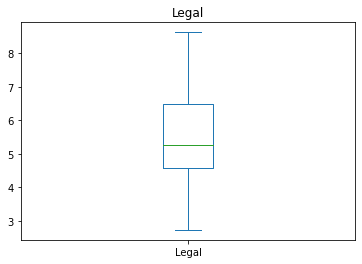

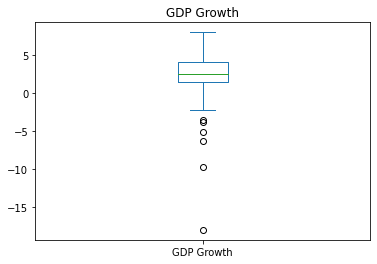

In [159]:
plt.figure(1)
countriesDF['Corruption'].plot(kind = 'box', title = 'Corruption')

plt.figure(2)
countriesDF['Peace'].plot(kind = 'box', title = 'Peace')

plt.figure(3)
countriesDF['Legal'].plot(kind = 'box', title = 'Legal')

plt.figure(4)
countriesDF['GDP Growth'].plot(kind = 'box', title = 'GDP Growth')

plt.show()

<div class="alert alert-block alert-success"> 
    <b>Outliers:</b> <br>
    There are potential outliers in feature(s): Peace and GDP Growth.
</div>

----
<div class="alert alert-block alert-danger"> <b>01-04) Create scatter plots for all pairs of numerical variables (4%): </b><i>(you need to complete and run the first two lines for all pairs of numerical variables)</i> 
    <ul>
        <li>What patterns can you see in scatter plots? <br><i>Compare the plots with the correlation matrix from the question 01-02</i></li>
    </ul>
</div>


<Figure size 432x288 with 0 Axes>

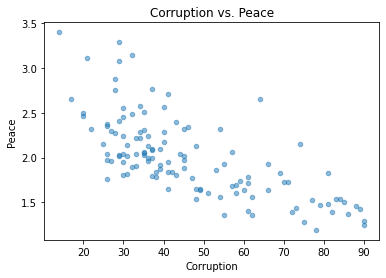

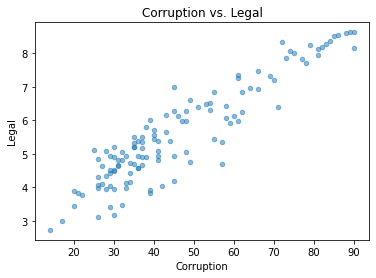

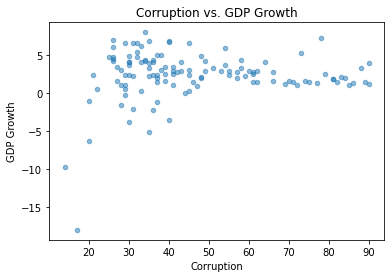

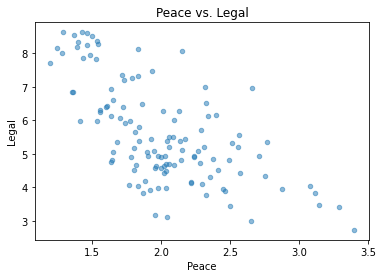

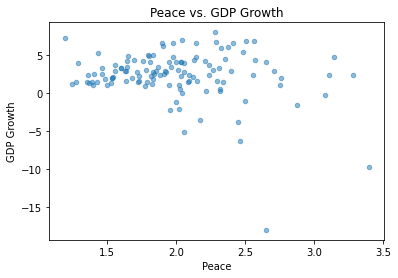

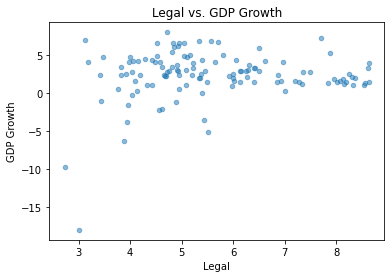

In [160]:
plt.figure(1)
countriesDF.plot(kind = 'scatter', x= 'Corruption', y= 'Peace', title = 'Corruption vs. Peace' , alpha = 0.5)

plt.figure(2)
countriesDF.plot(kind = 'scatter', x= 'Corruption', y= 'Legal', title = 'Corruption vs. Legal' , alpha = 0.5)

plt.figure(3)
countriesDF.plot(kind = 'scatter', x= 'Corruption', y= 'GDP Growth', title = 'Corruption vs. GDP Growth' , alpha = 0.5)

plt.figure(4)
countriesDF.plot(kind = 'scatter', x= 'Peace', y= 'Legal', title = 'Peace vs. Legal' , alpha = 0.5)

plt.figure(5)
countriesDF.plot(kind = 'scatter', x= 'Peace', y= 'GDP Growth', title = 'Peace vs. GDP Growth' , alpha = 0.5)

plt.figure(6)
countriesDF.plot(kind = 'scatter', x= 'Legal', y= 'GDP Growth', title = 'Legal vs. GDP Growth' , alpha = 0.5)

plt.show()

<div class="alert alert-block alert-success"> <b>Patterns based on scatter plots: </b>
    <BR> 
    From the 6 scatter plots, we can easily conclude that corruption and legal have a strong postitive correlation. Besides, There are negative relationship between corruption vs. peace and peace vs.legal. The other three pairs of variables don't show any relationships from the plots.
</div>

<div class="alert alert-block alert-danger"> <b>01-05) Apply feature scaling and explain its importance(4%): </b>
    <ul>
        <li>Why is feature scaling critical before calculating distances between observations and clusters?</li>
        <li>How can you reverse the feature scaling and retrieve actual values?</li>
    </ul>
</div>

In [161]:
countriesDF2=countriesDF[['Country', 'Corruption', 'Peace', 'Legal', 'GDP Growth']]
countriesDF2.set_index('Country', inplace=True)
countriesDF2 = countriesDF2.apply(lambda x: x.astype('float64'))

# pandas uses sample standard deviation
countriesDF_Norm = (countriesDF2 - countriesDF2.mean())/countriesDF2.std()

<div class="alert alert-block alert-success"> <b>Feature Scaling: </b>
    <BR> 
    ------- (The importance of feature scaling) ------- 
        Feature scaling is crucial before computing distances between observations and clusters, because distances in different feature dimensions can be measured on various scales or units. Both very large and very small scales are possible. If the scales of the characteristics are extremely diverse, the larger scale features will dominate the calculation of distances between the observations and the clusters, while the smaller scale features will have very little influence. As a result, the clustering and warped distances may not accurately reflect the true patterns in the data. Scaling the features to the same range allows all features to contribute equally to the calculation of distances, producing clustering findings that are more precise and substantive.
    <BR> 
    ------- (How to reverse feature scaling to calculate actual values) -------
        The same scaling method and parameters that were used to scale the features initially should be utilised to reverse feature scaling to get the actual values. In our example the actual values (countriesDF2) = scaled value (countriesDF_Norm) * standard_deviation + mean
        
</div>

-------
-------
### Question 02: Hierarchical Clustering  (30%)
----
<div class="alert alert-block alert-danger"> <b>02-01) Compute normalized distances based on <u><i>Peace</i></u> and <u><i>Legal</i></u> (2%): </b>
</div>


In [162]:
# compute normalized distance based on Sales and Fuel Cost
distanceNorm = pairwise.pairwise_distances(countriesDF_Norm[['Peace','Legal']], 
                                     metric='euclidean')

----
<div class="alert alert-block alert-danger"> <b>02-02) Apply hierarchical clustering (28%)</b>
    <ul>
        <li>Use at least two different distance measurement methods (e.g. Single vs. Average or Ward's). Compare Dendrograms and explain why different methods create different results. (10%)</li>
        <li>Select a distance measurement method (ward preferably). Use the Dendrogram coupled with practical considerations to identify a reasonable number of clusters. (5%) <i>You need to adjust the color threshold and the horizontal line position.</i>
        <li>Use cluster summary (count, mean, min, max) to give each cluster a meaningful label. (13%) </li>
    </ul>
</div>




<Figure size 432x288 with 0 Axes>

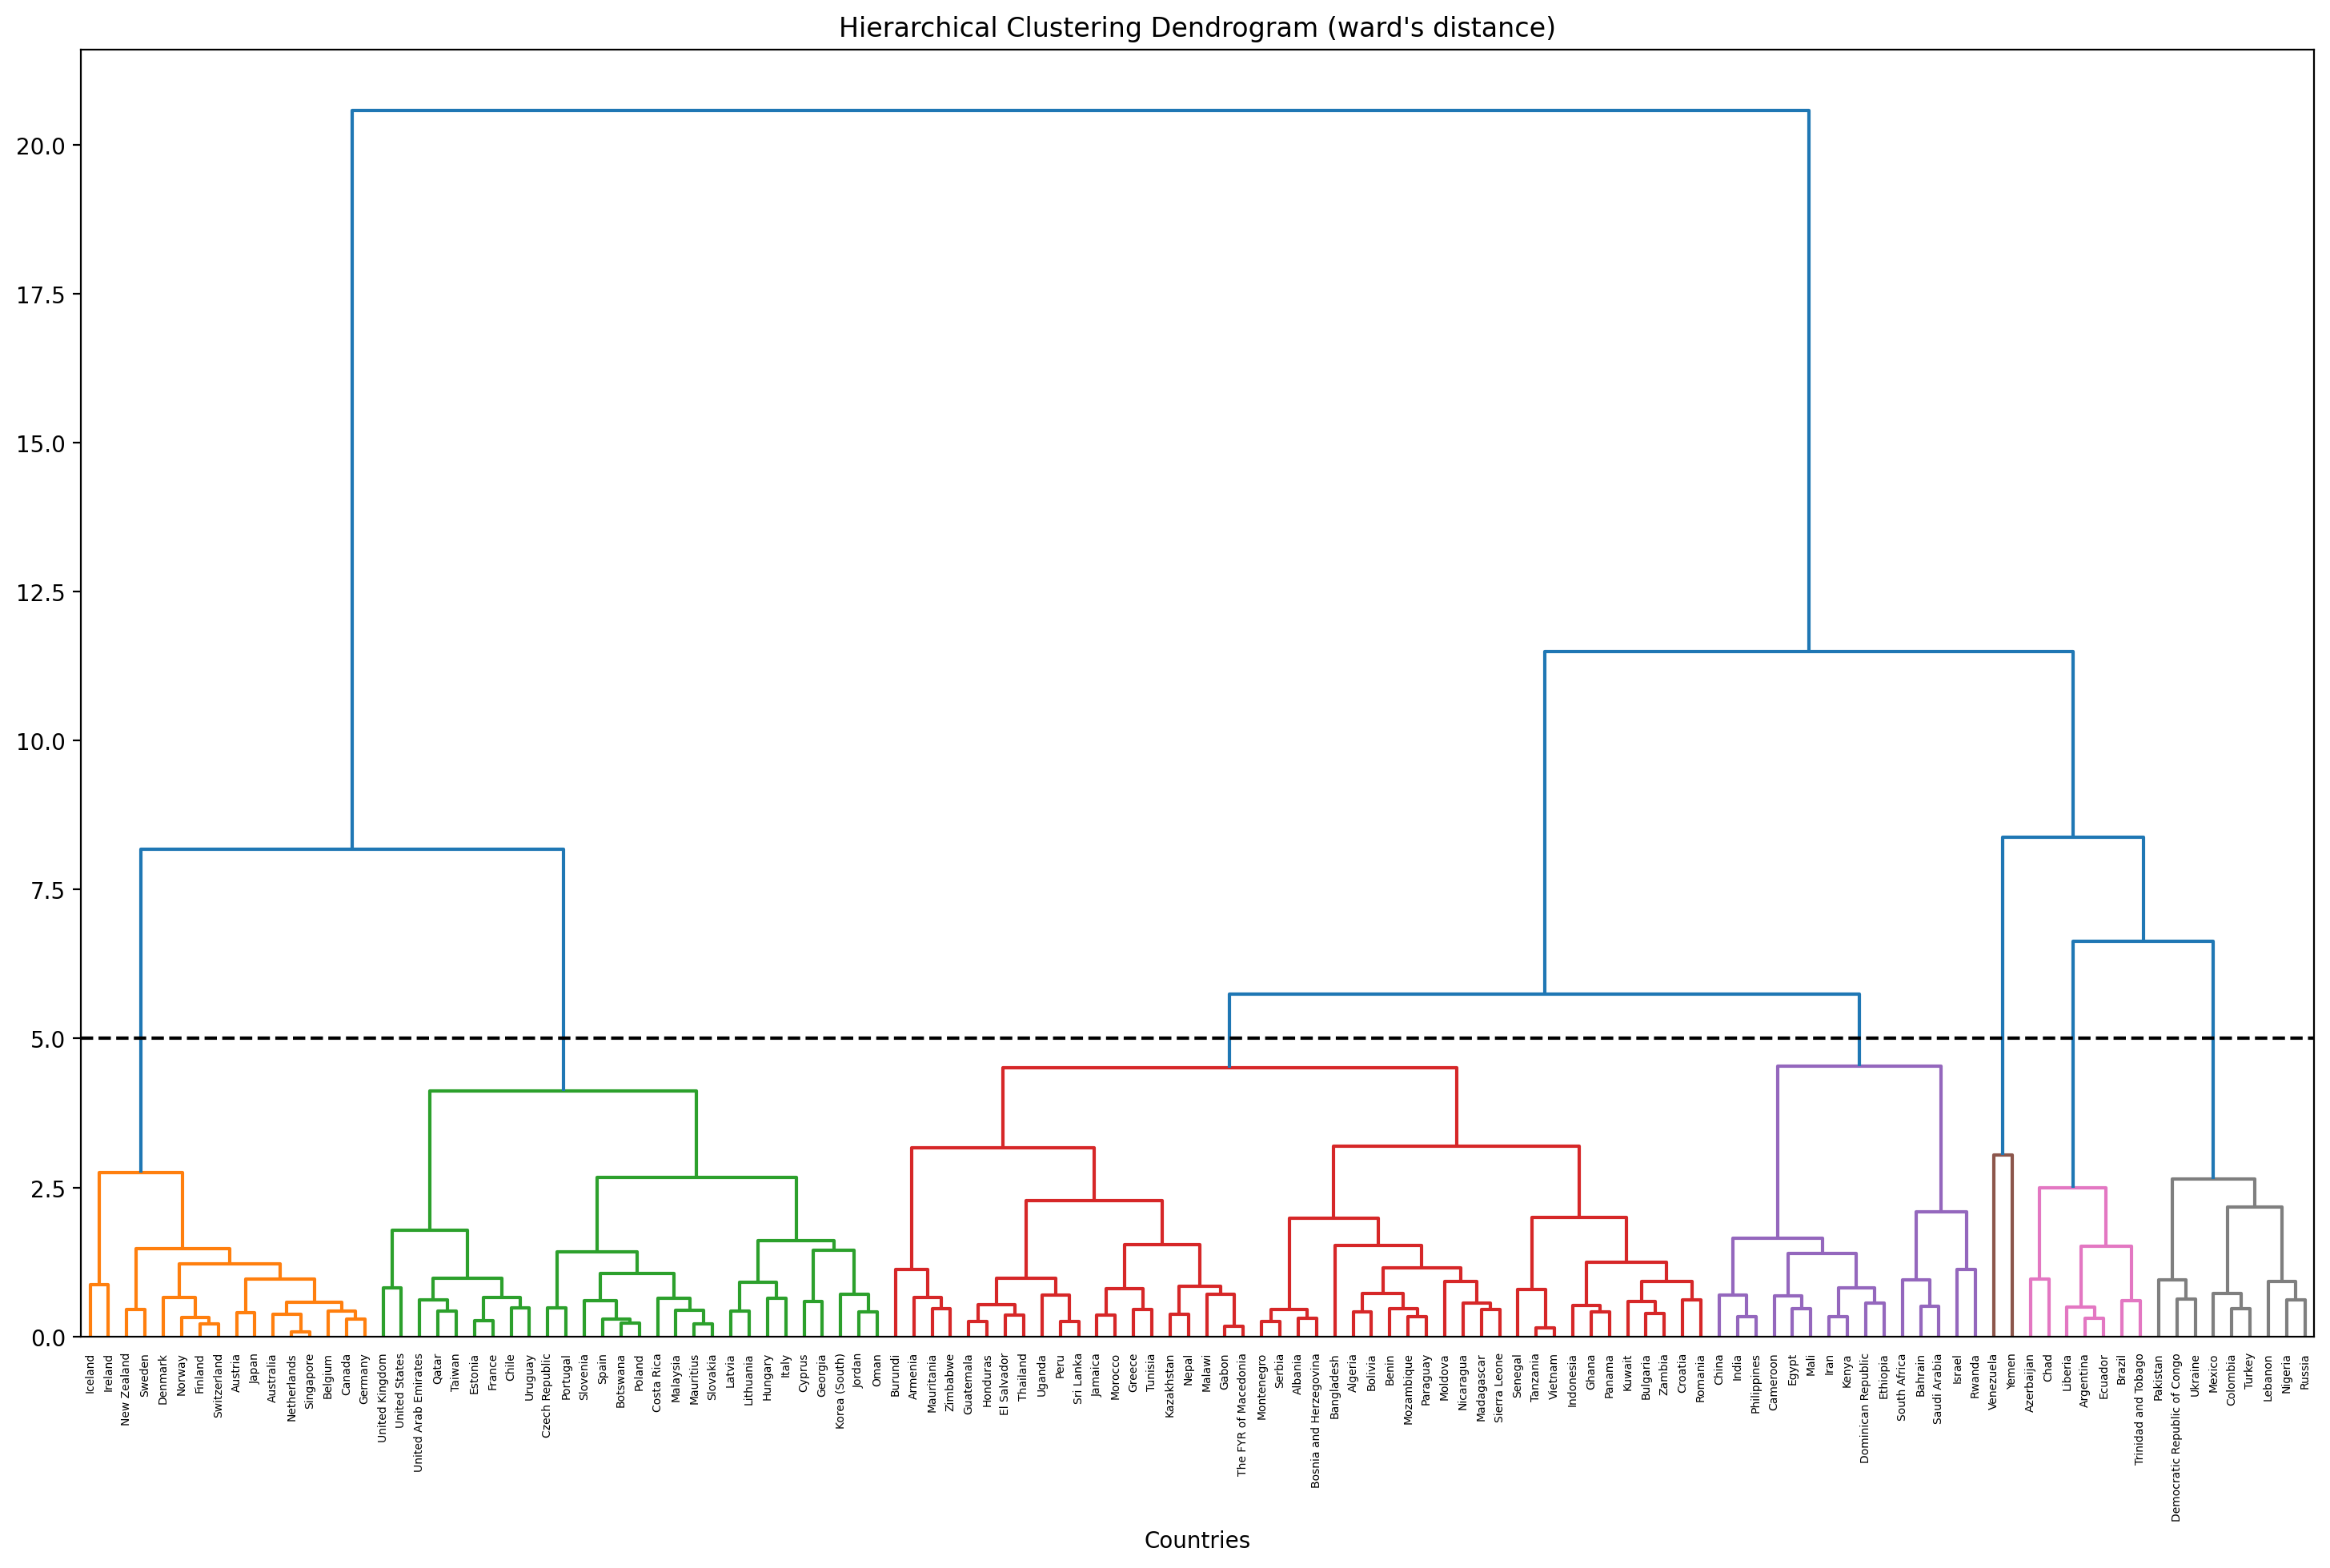

<Figure size 432x288 with 0 Axes>

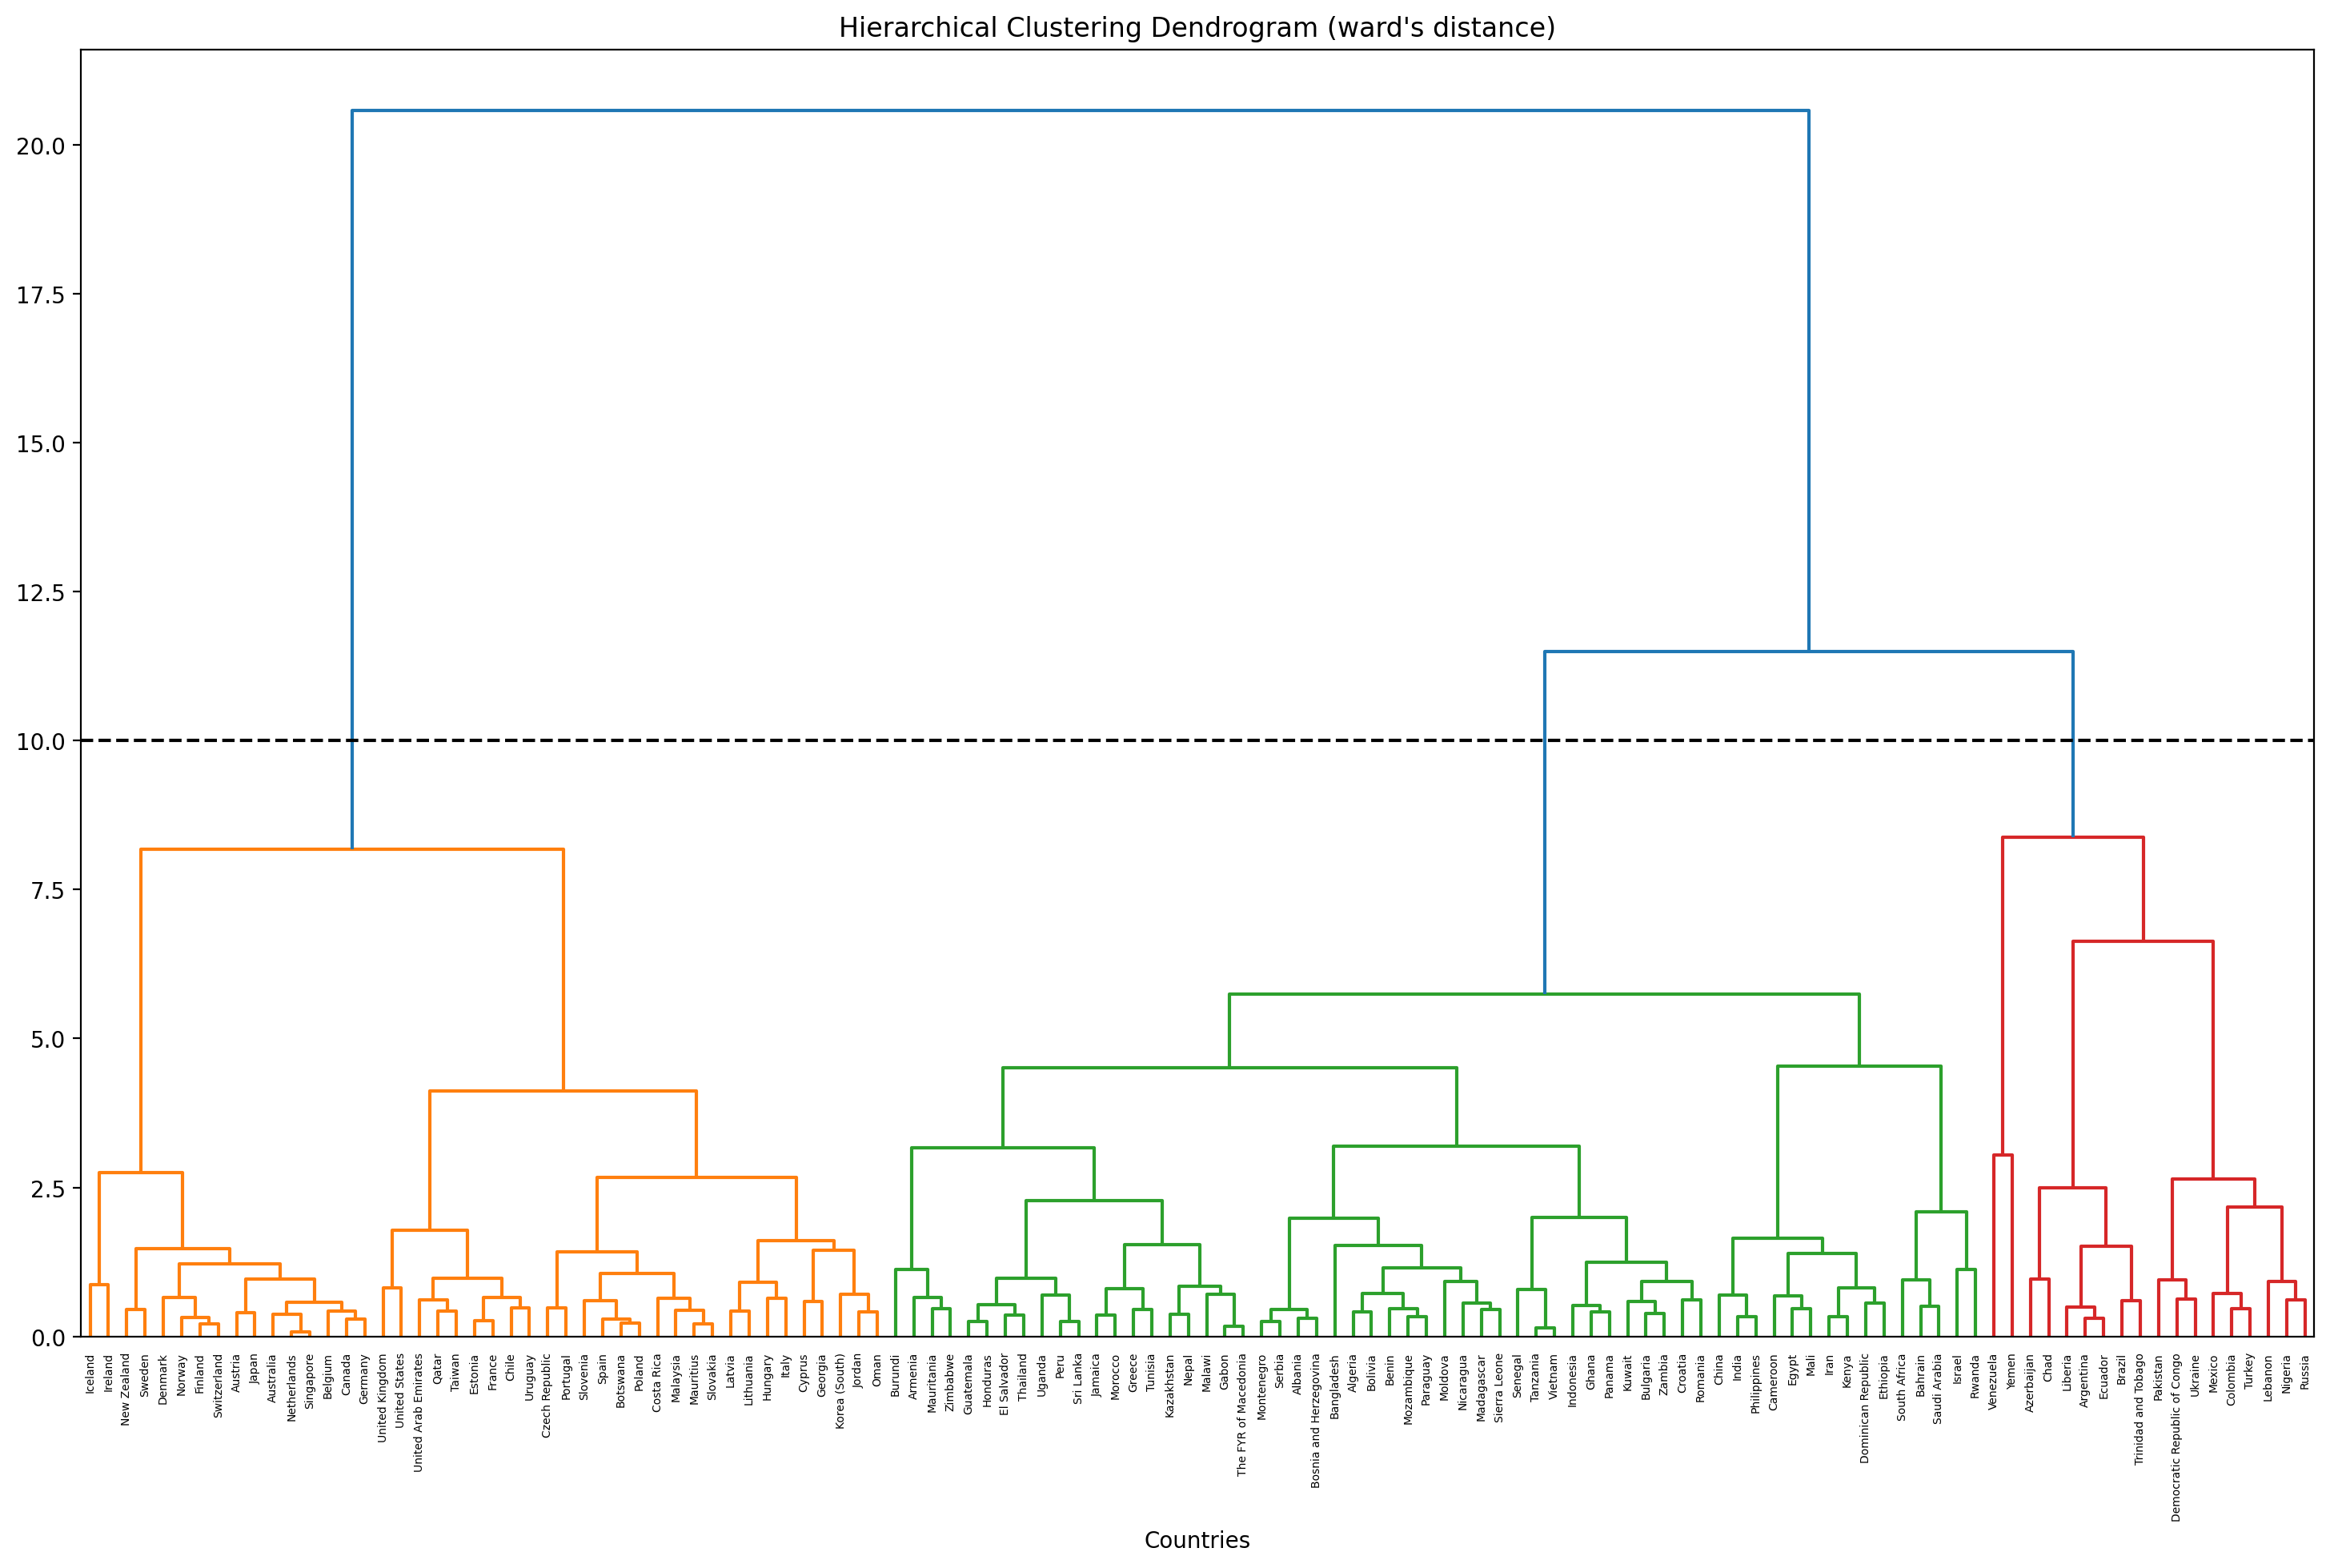

In [163]:
Z = linkage(countriesDF_Norm, method='ward')

plt.figure(1)
fig = plt.figure(figsize=(18, 12), dpi=200)
fig.subplots_adjust(bottom=0.21)
plt.title("Hierarchical Clustering Dendrogram (ward's distance)")
plt.xlabel('Countries')
dendrogram(Z, labels=countriesDF_Norm.index, color_threshold=5.0)
plt.axhline(y=5.0, color='black', linewidth=1.5, linestyle='dashed')
plt.show()

plt.figure(2)
fig = plt.figure(figsize=(18, 12), dpi=200)
fig.subplots_adjust(bottom=0.21)
plt.title("Hierarchical Clustering Dendrogram (ward's distance)")
plt.xlabel('Countries')
dendrogram(Z, labels=countriesDF_Norm.index, color_threshold=10.0)
plt.axhline(y=10.0, color='black', linewidth=1.5, linestyle='dashed')
plt.show()

#After comparing the two clustering and cosidering the total number of countries, I believe 7 (as figure 1) is a reasonalbe number of clusters.

<div class="alert alert-block alert-warning"> 
    <b>Comparison: </b> Redo the previous block of code in the following Cell(s) for at least one other measurement method and compare the results.<br>
    <b>dpi (dot per inch): </b> a higher value of dpi allows you to have a high-quality image that you can download or open in a new tab. 
</div>

In [164]:
#Use single method

<div class="alert alert-block alert-success"> <b>Difference between Single Linkage and at least another distance measurement method: </b>
    <BR> 
    The nearest-neighbor method, also known as the single linkage method, creates a hierarchical clustering by combining the two closest points in the data into a single cluster. 
Ward's method, on the other hand, minimises the variance of the merged clusters' distances. Ward's method aims to find the clustering solution with the smallest increase in variance. 
In summary, the Single linkage method is concerned with the closest pair of points, whereas Ward's method is concerned with the total within-cluster variance.
</div>



In [165]:
memb = fcluster(linkage(countriesDF_Norm, 'single'), 7, criterion='maxclust')
memb = pd.Series(memb, index=countriesDF_Norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  Iceland, Ireland
2 :  Albania, Algeria, Argentina, Armenia, Australia, Austria, Bahrain, Bangladesh, Belgium, Benin, Bolivia, Bosnia and Herzegovina, Botswana, Brazil, Bulgaria, Burundi, Cameroon, Canada, Chile, China, Colombia, Costa Rica, Croatia, Cyprus, Czech Republic, Democratic Republic of Congo, Denmark, Dominican Republic, Ecuador, Egypt, El Salvador, Estonia, Ethiopia, Finland, France, Gabon, Georgia, Germany, Ghana, Greece, Guatemala, Honduras, Hungary, India, Indonesia, Iran, Italy, Jamaica, Japan, Jordan, Kazakhstan, Kenya, Korea (South), Kuwait, Latvia, Lebanon, Liberia, Lithuania, Madagascar, Malawi, Malaysia, Mali, Mauritania, Mauritius, Mexico, Moldova, Montenegro, Morocco, Mozambique, Nepal, Netherlands, New Zealand, Nicaragua, Nigeria, Norway, Oman, Pakistan, Panama, Paraguay, Peru, Philippines, Poland, Portugal, Qatar, Romania, Russia, Rwanda, Saudi Arabia, Senegal, Serbia, Sierra Leone, Singapore, Slovakia, Slovenia, South Africa, Spain, Sri Lanka, Sweden, Swit

In [166]:
countriesDF['clusterH']=list(memb)
clusterSummaryH = countriesDF.groupby(['clusterH']).agg({'Country':['count'],
                                                    'Corruption': ['mean', 'std', 'min', 'max'],
                                                    'Peace': ['mean', 'std', 'min', 'max'],
                                                    'Legal': ['mean', 'std', 'min', 'max'],
                                                    'GDP Growth': ['mean', 'std', 'min', 'max']   
                                                      })
clusterSummaryH

Country Corruption                        Peace                   \
           count       mean        std min max      mean       std    min   
clusterH                                                                    
1              2  75.500000   3.535534  73  78  1.312500  0.170413  1.192   
2            115  46.478261  18.583783  20  90  1.984435  0.419237  1.246   
3              1  30.000000        NaN  30  30  2.450000       NaN  2.450   
4              1  20.000000        NaN  20  20  2.464000       NaN  2.464   
5              1  64.000000        NaN  64  64  2.656000       NaN  2.656   
6              1  14.000000        NaN  14  14  3.399000       NaN  3.399   
7              1  17.000000        NaN  17  17  2.651000       NaN  2.651   

                    Legal                         GDP Growth            \
            max      mean       std    min    max       mean       std   
clusterH                                                                 
1         1.433  7.786000  0.121622  7.700  7.872    6.21100  1.398657   
2         3.287  5.625652  1.437192  3.117  8.633    2.70393  2.191840   
3         2.450  3.946000       NaN  3.946  3.946   -3.77200       NaN   
4         2.464  3.891000       NaN  3.891  3.891   -6.37300       NaN   
5         2.656  6.974000       NaN  6.974  6.974    4.00300       NaN   
6         3.399  2.728000       NaN  2.728  2.728   -9.77900       NaN   
7         2.651  3.000000       NaN  3.000  3.000  -18.00000       NaN   

                          
             min     max  
clusterH                  
1          5.222   7.200  
2         -5.110   7.958  
3         -3.772  -3.772  
4         -6.373  -6.373  
5          4.003   4.003  
6         -9.779  -9.779  
7        -18.000 -18.000

<div class="alert alert-block alert-success"> 
    <b>Cluster Labeling</b> <br>
    <ul>
        <li>Cluster 01 Name: <i>I named cluster 1 as very low risk countries as both Iceland and Ireland have low corruption, high peaceful, favorable legal risk and high GDP growth.</i></li>
        <li>Cluster 02 Name: <i>I named cluster 2 as normal risk countries as all countries in these cluster are niether have many outstanding rate score nor have many disapointing score in four aspects.</i></li>
        <li>Cluster 05 Name: <i>I named cluster 5 seperately as high risk countries. Compared with other normal risk countries, Israel's peace socre is too low. Eventhough its other socres are ok, I still believe Israel should be labled as high risk. </i></li>
        <li>Cluster 03,04,06,07 Name: <i>I named these cluster as extremly high risk countries as all countries' corruption in these clusters are lower than 30. Their peace score all lower than 3.399 mostly around 2.5. Thier legal score are lower than3.946. And they all have negative GDP growth. None of these countries have a accept score in any evaluation aspects, therefore I named them as extremly high risk.</i></li>       
    </ul>
</div>

**Add cluster labels to the dataframe using the following block of code:**

In [167]:
countriesDF['clusterHLabel']=""
countriesDF['clusterHLabel'] = np.where(countriesDF['clusterH'] ==1 , 'low risk countries',countriesDF['clusterHLabel'])
countriesDF['clusterHLabel'] = np.where(countriesDF['clusterH'] ==2 , 'normal risk countries',countriesDF['clusterHLabel'])
countriesDF['clusterHLabel'] = np.where(countriesDF['clusterH'] ==5 , 'high risk countries',countriesDF['clusterHLabel'])
countriesDF['clusterHLabel'] = np.where(countriesDF['clusterH'].isin([3,4,6,7]), 'extremely high risk countries', countriesDF['clusterHLabel'])


------
------
### Question 03: K-Means Clustering (25%)
----
<div class="alert alert-block alert-danger"> <b>03-01) Use k-means clustering with the same number of clusters you found applying hierarchical clustering. (10%)</b>
</div>


In [168]:
# pandas uses sample standard deviation
countriesDF_KNorm = (countriesDF2 - countriesDF2.mean())/countriesDF2.std()

kmeans = KMeans(n_clusters=7, random_state=0).fit(countriesDF_KNorm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=countriesDF_KNorm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  Australia, Austria, Belgium, Canada, Denmark, Finland, Germany, Iceland, Ireland, Japan, Netherlands, New Zealand, Norway, Singapore, Sweden, Switzerland, United Kingdom
1 :  Algeria, Bangladesh, Benin, Bolivia, Cameroon, China, Dominican Republic, Ethiopia, Guatemala, Honduras, India, Iran, Kenya, Madagascar, Mali, Moldova, Mozambique, Nicaragua, Paraguay, Philippines, Senegal, Sierra Leone, Sri Lanka, Tanzania, Thailand, Uganda, Vietnam
2 :  Argentina, Armenia, Azerbaijan, Brazil, Chad, Ecuador, Liberia, Trinidad and Tobago
3 :  Botswana, Chile, Costa Rica, Czech Republic, Estonia, France, Hungary, Israel, Korea (South), Latvia, Lithuania, Malaysia, Mauritius, Poland, Portugal, Qatar, Rwanda, Slovakia, Slovenia, Spain, Taiwan, United Arab Emirates, United States, Uruguay
4 :  Burundi, Colombia, Democratic Republic of Congo, Egypt, Lebanon, Mauritania, Mexico, Nigeria, Pakistan, Russia, Turkey, Ukraine, Zimbabwe
5 :  Venezuela, Yemen
6 :  Albania, Bahrain, Bosnia and Herzegovina,

In [169]:
withinClusterSS = [0] * 7
clusterCount = [0] * 7
for cluster, distance in zip(kmeans.labels_, kmeans.transform(countriesDF_KNorm)):
    withinClusterSS[cluster] += distance[cluster]**2
    clusterCount[cluster] += 1
for cluster, withClustSS in enumerate(withinClusterSS):
    print('Cluster {} ({} members): {:5.2f} within cluster'.format(cluster, 
        clusterCount[cluster], withinClusterSS[cluster]))

Cluster 0 (17 members):  8.16 within cluster
Cluster 1 (27 members): 17.59 within cluster
Cluster 2 (8 members):  6.34 within cluster
Cluster 3 (24 members): 19.90 within cluster
Cluster 4 (13 members): 13.59 within cluster
Cluster 5 (2 members):  4.64 within cluster
Cluster 6 (31 members): 22.04 within cluster


----
<div class="alert alert-block alert-danger"> <b>03-02) Use the parallel coordinate plot and the cluster summary to characterize and label the clusters. (10%)</b>
</div>

In [170]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=countriesDF_KNorm.columns)
pd.options.display.max_rows = 7
#in older versions you may use this command: pd.set_option('precision', 3)
print(centroids)

   Corruption     Peace     Legal  GDP Growth
0    1.866712 -1.274052  1.773942   -0.008940
1   -0.761829  0.330759 -0.628476    0.866580
2   -0.705188  0.365422 -0.655780   -1.668191
3    0.726080 -0.591796  0.694348    0.089665
4   -0.897230  1.704908 -0.959810   -0.232076
5   -1.607083  2.280510 -1.838774   -5.016951
6   -0.260354 -0.087636 -0.272619    0.032219


,Corruption,Peace,Legal,GDP Growth,cluster
0,1.866712,-1.274052,1.773942,-0.008940,Cluster 0
1,-0.761829,0.330759,-0.628476,0.866580,Cluster 1
2,-0.705188,0.365422,-0.655780,-1.668191,Cluster 2
3,0.726080,-0.591796,0.694348,0.089665,Cluster 3
4,-0.897230,1.704908,-0.959810,-0.232076,Cluster 4
5,-1.607083,2.280510,-1.838774,-5.016951,Cluster 5
6,-0.260354,-0.087636,-0.272619,0.032219,Cluster 6


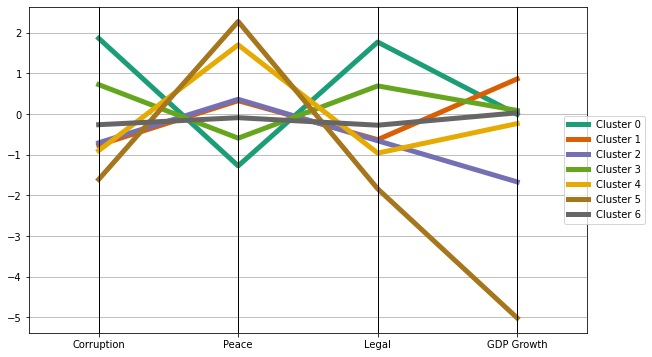

In [171]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]

plt.figure(figsize=(10,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,3.5)
centroids

In [172]:
countriesDF_KNorm.groupby(kmeans.labels_).mean()

,Corruption,Peace,Legal,GDP Growth
0,1.866712,-1.274052,1.773942,-0.008940
1,-0.761829,0.330759,-0.628476,0.866580
2,-0.705188,0.365422,-0.655780,-1.668191
3,0.726080,-0.591796,0.694348,0.089665
4,-0.897230,1.704908,-0.959810,-0.232076
5,-1.607083,2.280510,-1.838774,-5.016951
6,-0.260354,-0.087636,-0.272619,0.032219


In [173]:
print(pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')))

          0         1         2         3         4         5         6
0  0.000000  4.002847  4.237831  1.715156  4.902731  7.926793  3.181524
1  4.002847  0.000000  2.535788  2.327754  1.795396  6.371557  1.117732
2  4.237831  2.535788  0.000000  2.806724  1.996487  4.134567  1.855087
3  1.715156  2.327754  2.806724  0.000000  3.278679  6.796177  1.471582
4  4.902731  1.795396  1.996487  3.278679  0.000000  4.950032  2.039831
5  7.926793  6.371557  4.134567  6.796177  4.950032  0.000000  5.947163
6  3.181524  1.117732  1.855087  1.471582  2.039831  5.947163  0.000000


In [174]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')).sum(axis=0)

0    25.966883
1    18.151074
2    17.566484
3    18.396073
4    18.963156
5    36.126289
6    15.612918
dtype: float64

In [175]:
countriesDF['clusterK']=list(memb)
clusterSummaryK = countriesDF.groupby(['clusterK']).agg({'Country':['count'],
                                                    'Corruption': ['mean', 'std', 'min', 'max'],
                                                    'Peace': ['mean', 'std', 'min', 'max'],
                                                    'Legal': ['mean', 'std', 'min', 'max'],
                                                    'GDP Growth': ['mean', 'std', 'min', 'max']
                                                      })
clusterSummaryK

Country Corruption                       Peace                   \
           count       mean       std min max      mean       std    min   
clusterK                                                                   
0             17  81.941176  5.727899  72  90  1.433176  0.146555  1.192   
1             27  31.666667  5.000000  25  45  2.151852  0.219745  1.763   
2              8  32.750000  6.088631  20  40  2.167375  0.199130  1.957   
3             24  60.125000  6.936435  48  74  1.738708  0.294493  1.356   
4             13  29.076923  6.075381  20  41  2.767231  0.318680  2.295   
5              2  15.500000  2.121320  14  17  3.025000  0.528916  2.651   
6             31  41.258065  6.587704  29  57  1.964484  0.196489  1.633   

                    Legal                         GDP Growth            \
            max      mean       std    min    max       mean       std   
clusterK                                                                 
0         1.830  8.237294  0.295150  7.700  8.633   2.343588  1.695512   
1         2.566  4.664111  0.631182  3.117  5.712   5.181519  1.403552   
2         2.464  4.623500  0.626695  3.891  5.503  -3.034750  2.124509   
3         2.656  6.631583  0.620069  5.341  8.074   2.663208  1.158005   
4         3.287  4.171308  0.649797  3.424  5.354   1.620308  1.873243   
5         3.399  2.864000  0.192333  2.728  3.000 -13.889500  5.813125   
6         2.398  5.193387  0.764459  3.822  7.000   2.477000  1.293303   

                         
             min    max  
clusterK                 
0          0.999  7.200  
1          3.000  7.958  
2         -6.373  0.208  
3          1.213  5.932  
4         -1.541  4.707  
5        -18.000 -9.779  
6          0.012  5.016

<div class="alert alert-block alert-success"> 
    <b>Cluster Labeling</b> <br>
    <ul>
        <li>Cluster 00,03 Name: <i>These two clusters are labeled together as low risk countries as all countries in these two cluster have low corruption, high peaceful(low score), favorable legal risk and GDP growth. </i></li>
        <li>Cluster 05 Name: <i> I labeled this cluster as high risk countries. Countries in cluster 05 lead to a very low average corruption score, high average peace score(means not peaceful), low average legal score and large negative average score about GDP growth. None of these score is accepatable in any evaluation aspects, therefore I believe they should be labeled as high risk countries.  </i></li>
        <li>Cluster 01,04,06 Name: <i>Base on the cluster summary above, the mean of each variable of each of these three clusters are in a middle range compare to the overall range of each variable. These means that risks of countries clusters01,04,and 06 are acceptable. Therefore, I want to label them as normal risk countries.   </i></li>
        <li>Cluster 02 Name: <i>This cluster group brings my attention as it has fair corruption,peace and legal socres as the normal risk countries, but its average GDP growth is negative. Therefore, I would like to label them as high risk countries for international investment. </i></li>
    </ul>
</div>

**Add cluster labels to the dataframe using the following block of code:**

In [176]:
countriesDF['clusterKLabel']=""
countriesDF['clusterKLabel'] = np.where(countriesDF['clusterK'].isin([0,3]) ,'low risk countries' ,countriesDF['clusterKLabel'])
countriesDF['clusterKLabel'] = np.where(countriesDF['clusterK'] ==5 , 'extremely high risk countries',countriesDF['clusterKLabel'])
countriesDF['clusterKLabel'] = np.where(countriesDF['clusterK'].isin([1,4,6]) , 'normal risk countries',countriesDF['clusterKLabel'])
countriesDF['clusterKLabel'] = np.where(countriesDF['clusterK'] ==2 , 'high risk countries',countriesDF['clusterKLabel'])

<div class="alert alert-block alert-warning"> <b>Centroids vs. Cluster summary:</b><br>
    Centroids are computed based on normalized distance, and you can calculate cluster summaries by reversing the normalization process. You should multiply centroids by the standard deviation of each feature and add the feature's mean to the multiplication.
</div>

In [177]:
print((centroids*countriesDF2.std())+countriesDF2.mean())

   Corruption  GDP Growth     Legal     Peace cluster
0   81.941176    2.343588  8.237294  1.433176     NaN
1   31.666667    5.181519  4.664111  2.151852     NaN
2   32.750000   -3.034750  4.623500  2.167375     NaN
3   60.125000    2.663208  6.631583  1.738708     NaN
4   29.076923    1.620308  4.171308  2.767231     NaN
5   15.500000  -13.889500  2.864000  3.025000     NaN
6   41.258065    2.477000  5.193387  1.964484     NaN


----
<div class="alert alert-block alert-danger"> <b>03-03) What is the elbow chart? Use the elbow chart to argue if the number of clusters you chose was optimum. (5%)</b>
</div>

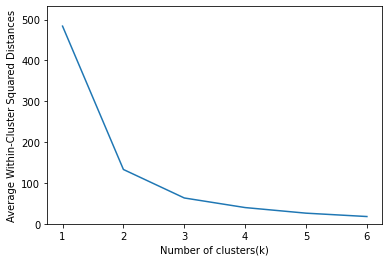

In [178]:
inertia = []
for n_clusters in range(1, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(countriesDF_KNorm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 7), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()


<div class="alert alert-block alert-success"> <b>Optimum number of clusters</b> <br>
    <i> EXPLAIN WHAT ELBOW CHART IS -- The elbow chart is a graphical representation used in clustering analysis to determine the number of clusters that should be used for a given dataset. The within-cluster sum of squares (WCSS) is plotted against the number of clusters. The WCSS is calculated by adding the squared distances between each data point in a cluster and its centroid (mean). 

The elbow chart is designed to select a number of clusters (elbow point) that results in a significant decrease in WCSS but only a marginal decrease in WCSS as the number of clusters increases. The "elbow point" is the point at which the WCSS decreases the most significantly. The number of clusters at the elbow point is thought to be the optimal number.</i> <br> and
<br>
    <i> ARGUE IF THE NUMBER OF CLUSTERS THEY USED IS AN OPTIMUM ONE </i> -- In one sentense, the number of cluster I chose was not the optimum. Base on the elbow chart above, the ideal number of clusters should be 2. When I chose the number of cluster to apply, I took into account the numbers of cluster giving a smaller WCSS. Therefore, I tried n_clusters= 2,3,4,5,6,7 in line[92] and calculated the sum of WCSS with each number of culsters. I noticed there was a great drop of the sum of WCSS when n changed from 6 to 7. Plus, in Q2, I also clustered the data into 7 groups. Therefore, I decied to use 7 as number of cluster. However, 7 clusters resulted in over-complex and over-fitted model. After realising this issue, I decided to simplify clusters a little bit. That was why when I labeled these clusters, I re-arranged them into 4 groups. <br>
</div>

-----
-----
### Question 04: Hierarchical vs. K-Means (15%)
----
<div class="alert alert-block alert-danger"> <b>How do you compare these results with the results from hierarchical clustering? Are they similar or different?(15%)</b>
</div>

In [156]:
clusterSummaryHK = countriesDF.groupby(['clusterKLabel','clusterHLabel']).agg({'Country':['count'],
                                                    'Corruption': ['mean'],
                                                    'Peace': ['mean'],
                                                    'Legal': ['mean'],
                                                    'GDP Growth': ['mean']
                                                                              })
pd.set_option('display.max_rows', 10)
clusterSummaryHK.head(7)

Country  \
                                                              count   
clusterKLabel                 clusterHLabel                           
extremely high risk countries extremely high risk countries       2   
high risk countries           extremely high risk countries       2   
                              normal risk countries               6   
low risk countries            high risk countries                 1   
                              low risk countries                  2   
                              normal risk countries              38   
normal risk countries         normal risk countries              71   

                                                            Corruption  \
                                                                  mean   
clusterKLabel                 clusterHLabel                              
extremely high risk countries extremely high risk countries  15.500000   
high risk countries           extremely high risk countries  25.000000   
                              normal risk countries          35.333333   
low risk countries            high risk countries            64.000000   
                              low risk countries             75.500000   
                              normal risk countries          68.973684   
normal risk countries         normal risk countries          35.380282   

                                                                Peace  \
                                                                 mean   
clusterKLabel                 clusterHLabel                             
extremely high risk countries extremely high risk countries  3.025000   
high risk countries           extremely high risk countries  2.457000   
                              normal risk countries          2.070833   
low risk countries            high risk countries            2.656000   
                              low risk countries             1.312500   
                              normal risk countries          1.600316   
normal risk countries         normal risk countries          2.182718   

                                                                Legal  \
                                                                 mean   
clusterKLabel                 clusterHLabel                             
extremely high risk countries extremely high risk countries  2.864000   
high risk countries           extremely high risk countries  3.918500   
                              normal risk countries          4.858500   
low risk countries            high risk countries            6.974000   
                              low risk countries             7.786000   
                              normal risk countries          7.280158   
normal risk countries         normal risk countries          4.804972   

                                                            GDP Growth  
                                                                  mean  
clusterKLabel                 clusterHLabel                             
extremely high risk countries extremely high risk countries -13.889500  
high risk countries           extremely high risk countries  -5.072500  
                              normal risk countries          -2.355500  
low risk countries            high risk countries             4.003000  
                              low risk countries              6.211000  
                              normal risk countries           2.298237  
normal risk countries         normal risk countries           3.348620

<div class="alert alert-block alert-success"> <b>Similarities between heirarchical and K-Means clustering</b> <br>
    ----------- <i> REPORT THE OVERLAP BETWEEN K-MEANS AND HEIRARCHICAL CLUSTERING MODELS</i> ---------------- both of these two models calculate the means for each variables. By comparing mean of each clusters. It's easy to conclude that 100% of the extremely high risk countires and normal risk countries in k-means model are overlapping with the HC model. But just part of the high risk countries and low risk countries are overlapping between these two models.<br>
</div>

-----
-----
### Question 05: Your Recommendations (15%)
----
<div class="alert alert-block alert-danger"> <b>What are (at least two) other factors affecting international investment risk in a country? Cite every reference you use to answer this question. (5%)</b>
</div>

----
Sovereign Risk<br>
This is the risk that a foreign central bank will change its foreign exchange regulations, reducing or eliminating the value of its foreign exchange contracts. Analyzing sovereign risk factors is beneficial to both equity and bond investors, but may be more directly beneficial to foreign investors. <br>
Perry, B. (2022, November 10). Evaluating country risk for international investing. Investopedia. Retrieved February 4, 2023, from https://www.investopedia.com/articles/stocks/08/country-risk-for-international-investing.asp <br>

Local Labour market<br>
Outsourcing labor-intensive production to countries with lower wages is a major incentive for multinational corporations to invest abroad. Therefore, before entering a foreign country, it is also critical to evaluate if the wage rates and level of skills of the local larbours meet the epxectations or requirments.<br>
Pettinger, T., Safiamazher, Shikuku, D., Stree, &amp; Naseer, M. (2021, December 9). Factors that affect foreign direct investment (FDI). Economics Help. Retrieved February 4, 2023, from https://www.economicshelp.org/blog/15736/economics/factors-that-affect-foreign-direct-investment-fdi/ 

----

----
<div class="alert alert-block alert-danger"> <b>Select a cluster and provide recommendations to lower the risk of investment. Support your recommendation using the findings from this assignment and your answer to the previous question. (5%)</b>
</div>

----

Base on the hierarchical clustering, my recomendation to have a lower risk of investment is to go to either Iceland or Ireland as they both have outstanding perfomance in the all the evaluations.  Please avoid but not only avoid to invest in Azerbaijan, Chad, Yemen, and Venezuela. These countries are evaluated as extremely high risk after the overall evaluations. I also do not recomend to invest in Israel, although there doesn't have corruption, peace or legal risk. The GDP growth of Israel is negative. This means that Isreal economy is weak and can not provide as much reliable returns as other countries.

----

-----
-----
### Question 06: Your Feedback (5%)
----
<div class="alert alert-block alert-danger"> <b>Feedback:(5%)</b>
    <ul>
        <li>How much time did you spend on this assignment? (1%)</li>
        <li>What prolems did you face? (2%)</li>
        <li>What did you learn? (2%)</li>
    </ul>    
</div>

----
<br>I spent two evenings working on this assignment. About 7 hours in total.<br>

I hardest part I found was about how to find the optimal numbers of clusters. I wasn't noticed that elbow can slove this issue until I saw it, so I spent a lot of time trying with different numbers and compair the clustering result "manually". I felt not confidence interpreting the reasons of different labels.<br>

After this assignment, I learned about the order of steps when clustering models and the importance of right order. Besides, having a right numbers of culuster is the key of building a good model. Therefore, I should always pay attention to over and under fitting issues.

----

Submission Feedback
Overall Feedback
Q1.

There are 121 countries and six features (-1)
Only three rows for head and tail (-0.5)
- Write the exact range values (for example, 76 for corruption) (-0.5)
- Relate the strength of the relationships among features to the correlation matrix (-0.5)

Q2. 

Explain the methods based on the dendrograms obtained (-2)
Adjust the color threshold and h-line in the dendrogram so that it matches the number of clusters chosen in the next part (you chose the "single" method in the next part with 7 clusters which are reflected in the ward dendrogram) (-2)
- Do you think clusters with one data point are reliable? How do you interpret them? (-3)
- You cannot name different clusters similarly. If they are similar, reduce the number of clusters (-2)
- Use feature values (e.g., means) to inform your labeling and explain your reasoning (-3)

Q3.

- Similarly, use feature values (e.g., means) to inform your labeling (-3)
It is good that you noticed the unreasonableness of 7 clusters using the elbow chart. You could rectify it in the previous parts to avoid misleading results.

Q4. 

- To what extent do the methods result in similar clusters? 
What do discrepancies indicate? (-6)

Q5. 

- Focus on clusters rather than countries when offering recommendations;
base your arguments on the obtained results as well as the additional factors suggested (-4)